In [2]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [3]:
# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용하고 있는 OS에 맞는 한글 폰트 경로로 수정해주세요.
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

### 태양열 발전량과 기상 데이터 간 상관분석

In [52]:
sun = pd.read_csv('sun.csv', encoding='utf-8')

In [53]:
weather = pd.read_csv('weather.csv',encoding='euc-kr')

In [54]:
weather

,날짜,지점,지점명,강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),지면온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),최저기온(°C),평균기온(°C),최고기온(°C)
0,2022-01-01,184,제주,NaN,3.12,60.99,0.66,0.99,NaN,4.83,3.21,24.97,4.82,6.94,7.63,8.60,0.1,5.04,10.9
1,2022-01-02,184,제주,0.00,3.41,66.61,0.48,0.54,NaN,4.30,3.19,16.87,5.78,7.07,7.55,8.39,-0.2,7.29,12.6
2,2022-01-03,184,제주,NaN,3.19,67.40,0.69,0.98,NaN,3.65,2.61,17.40,5.98,7.15,7.58,8.28,2.6,6.62,12.2
3,2022-01-04,184,제주,NaN,3.50,65.76,0.41,0.46,NaN,6.04,4.95,14.34,6.05,7.36,7.77,8.35,3.5,7.01,11.9
4,2022-01-05,184,제주,3.18,3.21,81.76,0.00,0.09,NaN,9.79,7.80,10.51,5.84,7.20,7.61,8.22,2.9,5.84,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-12-27,184,제주,NaN,2.27,70.45,0.56,0.88,NaN,5.96,4.02,23.06,8.66,8.47,8.39,7.93,5.7,9.37,13.2
726,2023-12-28,184,제주,NaN,2.63,68.26,0.50,0.89,NaN,5.96,4.38,12.00,9.20,9.28,9.27,8.70,6.1,10.12,14.6
727,2023-12-29,184,제주,NaN,3.11,69.31,0.40,0.79,NaN,5.75,4.97,8.81,8.16,9.84,9.88,9.26,5.4,8.46,13.4
728,2023-12-30,184,제주,0.52,2.71,75.29,0.50,0.87,NaN,5.77,2.89,17.22,10.14,9.67,9.72,9.34,4.6,11.07,16.9


In [55]:
sun.rename(columns={'일시': '날짜'}, inplace=True)

In [56]:
sun

,날짜,교래태양광,종합경기장 태양광,행원태양광,홍보관주차장 태양광,수산태양광,태양광전체
0,2022-01-01,2014.6,1705.888,1132.704,288.08,0.000,5141.272
1,2022-01-02,1116.0,577.984,428.832,115.96,0.000,2238.776
2,2022-01-03,1780.6,1386.752,1107.000,257.96,0.000,4532.312
3,2022-01-04,371.0,377.504,352.224,109.48,0.000,1210.208
4,2022-01-05,195.6,181.600,26.136,0.32,0.000,403.656
...,...,...,...,...,...,...,...
725,2023-12-27,1147.4,1055.840,373.176,188.40,3400.288,6165.104
726,2023-12-28,954.6,797.632,253.584,156.40,2719.797,4882.013
727,2023-12-29,1568.0,771.328,350.640,188.04,3859.493,6737.501
728,2023-12-30,1454.4,1026.752,335.016,189.68,3644.716,6650.564


In [57]:
df = pd.merge(weather, sun, on='날짜')

In [58]:
df

,날짜,지점,지점명,강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),...,30cm 지중온도(°C),최저기온(°C),평균기온(°C),최고기온(°C),교래태양광,종합경기장 태양광,행원태양광,홍보관주차장 태양광,수산태양광,태양광전체
0,2022-01-01,184,제주,NaN,3.12,60.99,0.66,0.99,NaN,4.83,...,8.60,0.1,5.04,10.9,2014.6,1705.888,1132.704,288.08,0.000,5141.272
1,2022-01-02,184,제주,0.00,3.41,66.61,0.48,0.54,NaN,4.30,...,8.39,-0.2,7.29,12.6,1116.0,577.984,428.832,115.96,0.000,2238.776
2,2022-01-03,184,제주,NaN,3.19,67.40,0.69,0.98,NaN,3.65,...,8.28,2.6,6.62,12.2,1780.6,1386.752,1107.000,257.96,0.000,4532.312
3,2022-01-04,184,제주,NaN,3.50,65.76,0.41,0.46,NaN,6.04,...,8.35,3.5,7.01,11.9,371.0,377.504,352.224,109.48,0.000,1210.208
4,2022-01-05,184,제주,3.18,3.21,81.76,0.00,0.09,NaN,9.79,...,8.22,2.9,5.84,9.0,195.6,181.600,26.136,0.32,0.000,403.656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-12-27,184,제주,NaN,2.27,70.45,0.56,0.88,NaN,5.96,...,7.93,5.7,9.37,13.2,1147.4,1055.840,373.176,188.40,3400.288,6165.104
726,2023-12-28,184,제주,NaN,2.63,68.26,0.50,0.89,NaN,5.96,...,8.70,6.1,10.12,14.6,954.6,797.632,253.584,156.40,2719.797,4882.013
727,2023-12-29,184,제주,NaN,3.11,69.31,0.40,0.79,NaN,5.75,...,9.26,5.4,8.46,13.4,1568.0,771.328,350.640,188.04,3859.493,6737.501
728,2023-12-30,184,제주,0.52,2.71,75.29,0.50,0.87,NaN,5.77,...,9.34,4.6,11.07,16.9,1454.4,1026.752,335.016,189.68,3644.716,6650.564


In [59]:
solar_columns = ['교래태양광', '종합경기장 태양광', '행원태양광', '홍보관주차장 태양광', '수산태양광']
df = df.drop(columns=solar_columns + ['지점', '지점명'])
correlations = {}
p_values = {}

In [60]:
for column in df.columns:
    if column not in ['태양광전체', '날짜', '교래태양광', '종합경기장 태양광', '행원태양광', '홍보관주차장 태양광', '수산태양광']:
        # NaN 값 제거
        valid_data = df[[column, '태양광전체']].dropna()
        if len(valid_data) > 0:
            corr, p_val = pearsonr(valid_data[column], valid_data['태양광전체'])
            correlations[column] = corr
            p_values[column] = p_val

In [61]:
results = pd.DataFrame({
    'Correlation': correlations,
    'P-Value': p_values
})

In [62]:
results.dropna()

,Correlation,P-Value
강수량(mm),-0.200583,3.858980e-05
풍속(m/s),-0.270786,9.826860e-14
습도(%),-0.334419,1.560921e-20
일조(hr),0.718802,4.745674e-117
일사(MJ/m2),0.782852,3.648018e-152
적설(cm),-0.205533,3.243148e-01
전운량(10분위),-0.657160,1.880504e-91
중하층운량(10분위),-0.697442,1.933139e-107
최저운고(100m ),0.256330,2.989344e-12
지면온도(°C),0.238331,6.913001e-11


In [63]:
results = results[(results['P-Value'] <= 0.05)]

In [64]:
results

,Correlation,P-Value
강수량(mm),-0.200583,3.858980e-05
풍속(m/s),-0.270786,9.826860e-14
습도(%),-0.334419,1.560921e-20
일조(hr),0.718802,4.745674e-117
일사(MJ/m2),0.782852,3.648018e-152
전운량(10분위),-0.657160,1.880504e-91
중하층운량(10분위),-0.697442,1.933139e-107
최저운고(100m ),0.256330,2.989344e-12
지면온도(°C),0.238331,6.913001e-11
10cm 지중온도(°C),0.187638,3.282866e-07


C:\Users\lotte\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\lotte\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


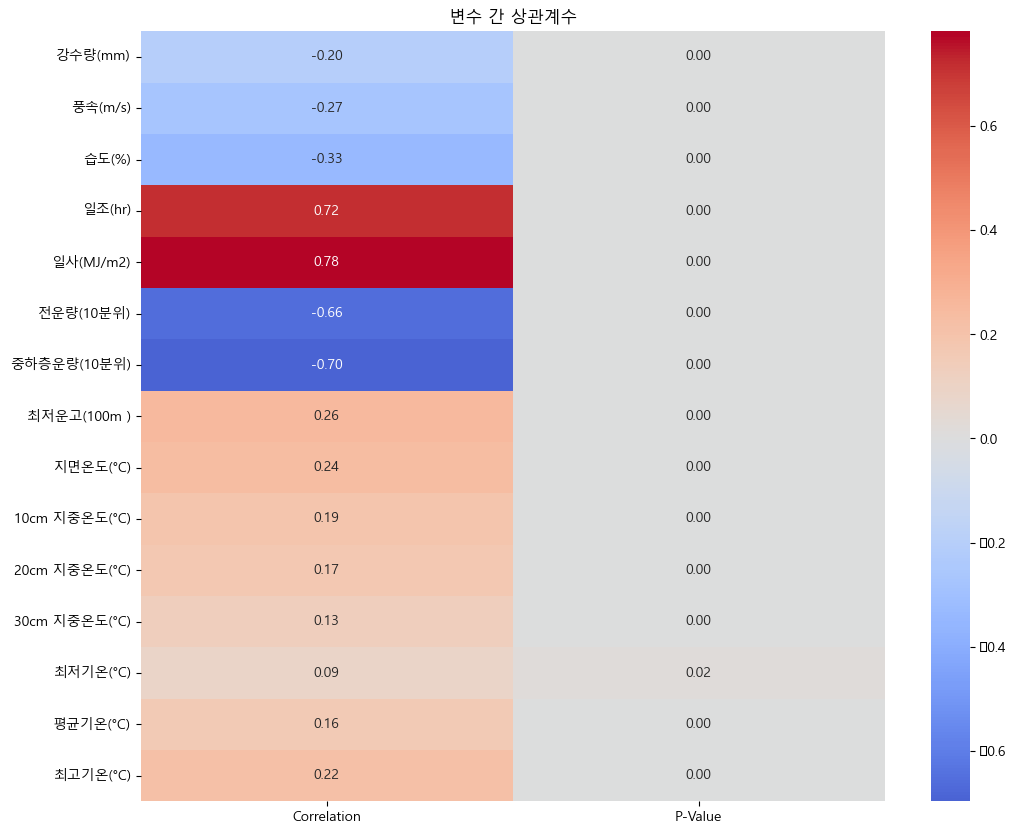

In [68]:
# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(results, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('변수 간 상관계수')
plt.show()

In [66]:
significant_results = results[(results['Correlation'].abs() >= 0.5)]

In [18]:
significant_results

,Correlation,P-Value
일조(hr),0.718802,4.745674e-117
일사(MJ/m2),0.782852,3.648018e-152
전운량(10분위),-0.657160,1.880504e-91
중하층운량(10분위),-0.697442,1.933139e-107


* p-value 값이 유의미하고 상관계수도 절댓값 0.5 이상인 기상 컬럼
    * 일조, 일사, 전운량, 중하층운량

### 태양열 발전량 + 풍력 발전량 병합 데이터 기상 데이터 간 상관분석

In [19]:
wind = pd.read_csv('wind.csv',encoding='utf-8')

In [20]:
wind.rename(columns={'일시': '날짜'}, inplace=True)

In [21]:
wind

,날짜,가시리풍력,김녕풍력,동복풍력,신창풍력,행원풍력,풍력전체
0,2022-01-01,84198.24,1803.96,44870.4,9280.62,50289.960,190443.180
1,2022-01-02,87253.92,3004.38,107424.0,7879.14,61820.940,267382.380
2,2022-01-03,165466.08,1355.76,43056.0,5874.48,45741.420,261493.740
3,2022-01-04,124738.56,4157.64,120326.4,10090.26,84647.520,343960.380
4,2022-01-05,95159.52,873.36,16502.4,14250.60,20419.740,147205.620
...,...,...,...,...,...,...,...
725,2023-12-27,25704.00,148.32,0.0,4412.70,623.940,30888.960
726,2023-12-28,58908.96,700.20,19728.0,5706.36,7559.820,92603.340
727,2023-12-29,135692.64,1560.24,43401.6,9274.68,24630.673,214559.833
728,2023-12-30,13851.36,187.02,7257.6,4978.62,1623.438,27898.038


In [22]:
df2 = pd.merge(wind, sun, on='날짜')

In [23]:
df2

,날짜,가시리풍력,김녕풍력,동복풍력,신창풍력,행원풍력,풍력전체,교래태양광,종합경기장 태양광,행원태양광,홍보관주차장 태양광,수산태양광,태양광전체
0,2022-01-01,84198.24,1803.96,44870.4,9280.62,50289.960,190443.180,2014.6,1705.888,1132.704,288.08,0.000,5141.272
1,2022-01-02,87253.92,3004.38,107424.0,7879.14,61820.940,267382.380,1116.0,577.984,428.832,115.96,0.000,2238.776
2,2022-01-03,165466.08,1355.76,43056.0,5874.48,45741.420,261493.740,1780.6,1386.752,1107.000,257.96,0.000,4532.312
3,2022-01-04,124738.56,4157.64,120326.4,10090.26,84647.520,343960.380,371.0,377.504,352.224,109.48,0.000,1210.208
4,2022-01-05,95159.52,873.36,16502.4,14250.60,20419.740,147205.620,195.6,181.600,26.136,0.32,0.000,403.656
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-12-27,25704.00,148.32,0.0,4412.70,623.940,30888.960,1147.4,1055.840,373.176,188.40,3400.288,6165.104
726,2023-12-28,58908.96,700.20,19728.0,5706.36,7559.820,92603.340,954.6,797.632,253.584,156.40,2719.797,4882.013
727,2023-12-29,135692.64,1560.24,43401.6,9274.68,24630.673,214559.833,1568.0,771.328,350.640,188.04,3859.493,6737.501
728,2023-12-30,13851.36,187.02,7257.6,4978.62,1623.438,27898.038,1454.4,1026.752,335.016,189.68,3644.716,6650.564


In [24]:
df3 = pd.merge(df2, weather, on='날짜')

In [25]:
df3

,날짜,가시리풍력,김녕풍력,동복풍력,신창풍력,행원풍력,풍력전체,교래태양광,종합경기장 태양광,행원태양광,...,전운량(10분위),중하층운량(10분위),최저운고(100m ),지면온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),최저기온(°C),평균기온(°C),최고기온(°C)
0,2022-01-01,84198.24,1803.96,44870.4,9280.62,50289.960,190443.180,2014.6,1705.888,1132.704,...,4.83,3.21,24.97,4.82,6.94,7.63,8.60,0.1,5.04,10.9
1,2022-01-02,87253.92,3004.38,107424.0,7879.14,61820.940,267382.380,1116.0,577.984,428.832,...,4.30,3.19,16.87,5.78,7.07,7.55,8.39,-0.2,7.29,12.6
2,2022-01-03,165466.08,1355.76,43056.0,5874.48,45741.420,261493.740,1780.6,1386.752,1107.000,...,3.65,2.61,17.40,5.98,7.15,7.58,8.28,2.6,6.62,12.2
3,2022-01-04,124738.56,4157.64,120326.4,10090.26,84647.520,343960.380,371.0,377.504,352.224,...,6.04,4.95,14.34,6.05,7.36,7.77,8.35,3.5,7.01,11.9
4,2022-01-05,95159.52,873.36,16502.4,14250.60,20419.740,147205.620,195.6,181.600,26.136,...,9.79,7.80,10.51,5.84,7.20,7.61,8.22,2.9,5.84,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-12-27,25704.00,148.32,0.0,4412.70,623.940,30888.960,1147.4,1055.840,373.176,...,5.96,4.02,23.06,8.66,8.47,8.39,7.93,5.7,9.37,13.2
726,2023-12-28,58908.96,700.20,19728.0,5706.36,7559.820,92603.340,954.6,797.632,253.584,...,5.96,4.38,12.00,9.20,9.28,9.27,8.70,6.1,10.12,14.6
727,2023-12-29,135692.64,1560.24,43401.6,9274.68,24630.673,214559.833,1568.0,771.328,350.640,...,5.75,4.97,8.81,8.16,9.84,9.88,9.26,5.4,8.46,13.4
728,2023-12-30,13851.36,187.02,7257.6,4978.62,1623.438,27898.038,1454.4,1026.752,335.016,...,5.77,2.89,17.22,10.14,9.67,9.72,9.34,4.6,11.07,16.9


In [26]:
energy_columns = ['교래태양광', '종합경기장 태양광', '행원태양광', '홍보관주차장 태양광', '수산태양광','가시리풍력','김녕풍력','동복풍력','신창풍력','행원풍력']
df3 = df3.drop(columns=energy_columns + ['지점', '지점명'])

In [27]:
df_merged = df3.dropna()

In [28]:
df_merged

,날짜,풍력전체,태양광전체,강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),지면온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),최저기온(°C),평균기온(°C),최고기온(°C)
10,2022-01-11,1004070.480,972.008,0.46,7.52,72.49,0.25,0.39,0.18,8.79,6.80,7.53,4.77,7.28,7.93,8.52,0.8,3.76,7.8
22,2022-01-23,219339.420,1011.672,1.11,3.59,85.26,0.00,0.29,0.80,9.77,5.81,12.13,9.30,8.83,8.53,8.27,8.2,10.17,12.2
35,2022-02-05,842527.080,2339.824,0.14,7.15,66.67,0.34,0.63,0.83,8.30,7.34,8.11,3.72,6.24,6.94,7.85,0.1,2.64,4.6
36,2022-02-06,570652.740,4184.096,0.02,5.54,57.49,0.50,0.77,0.80,7.52,6.45,10.70,4.86,6.30,6.80,7.64,1.5,3.93,6.6
50,2022-02-20,958839.540,3742.856,0.05,7.05,62.40,0.50,0.87,0.24,7.96,6.43,8.47,3.56,5.88,6.68,7.44,-1.0,1.59,4.1
350,2022-12-17,735254.167,1078.408,0.45,7.10,73.48,0.12,0.25,1.30,9.33,7.29,7.84,4.94,8.35,9.58,10.06,-0.7,3.49,7.7
351,2022-12-18,763399.250,1152.350,0.62,9.19,72.02,0.25,0.40,3.34,8.35,6.69,6.55,3.05,6.91,8.49,9.43,-2.1,1.47,3.6
352,2022-12-19,239648.536,1262.992,0.17,4.33,63.76,0.35,0.51,3.61,7.23,6.08,11.54,4.74,7.02,8.08,8.80,-0.2,5.16,9.1
355,2022-12-22,841415.187,90.928,0.92,7.84,77.41,0.15,0.14,0.96,8.47,6.67,7.08,4.18,7.79,8.99,9.12,-1.1,2.99,7.9
356,2022-12-23,520546.508,759.200,0.71,9.59,76.46,0.17,0.31,2.60,8.28,7.06,5.60,2.49,5.75,7.29,8.08,-1.6,0.97,3.4


In [29]:
def calculate_correlations(df_merged, target_column):
    correlations = {}
    p_values = {}
    for column in df_merged.columns:
        if column not in ['날짜', '태양광전체','풍력전체']:
            valid_data = df_merged[[column, target_column]].dropna()
            if len(valid_data) > 0:
                corr, p_val = pearsonr(valid_data[column], valid_data[target_column])
                correlations[column] = corr
                p_values[column] = p_val
    results = pd.DataFrame({
        'Correlation': correlations,
        'P-Value': p_values
    })
    return results

In [30]:
solar_correlations = calculate_correlations(df_merged, '태양광전체')
solar_correlations = solar_correlations[solar_correlations['P-Value'] <= 0.05]
print("Solar Correlations:")
print(solar_correlations)

Solar Correlations:
           Correlation   P-Value
강수량(mm)      -0.445406  0.025662
습도(%)        -0.457287  0.021546
일조(hr)        0.642068  0.000540
일사(MJ/m2)     0.712676  0.000064


C:\Users\lotte\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\lotte\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


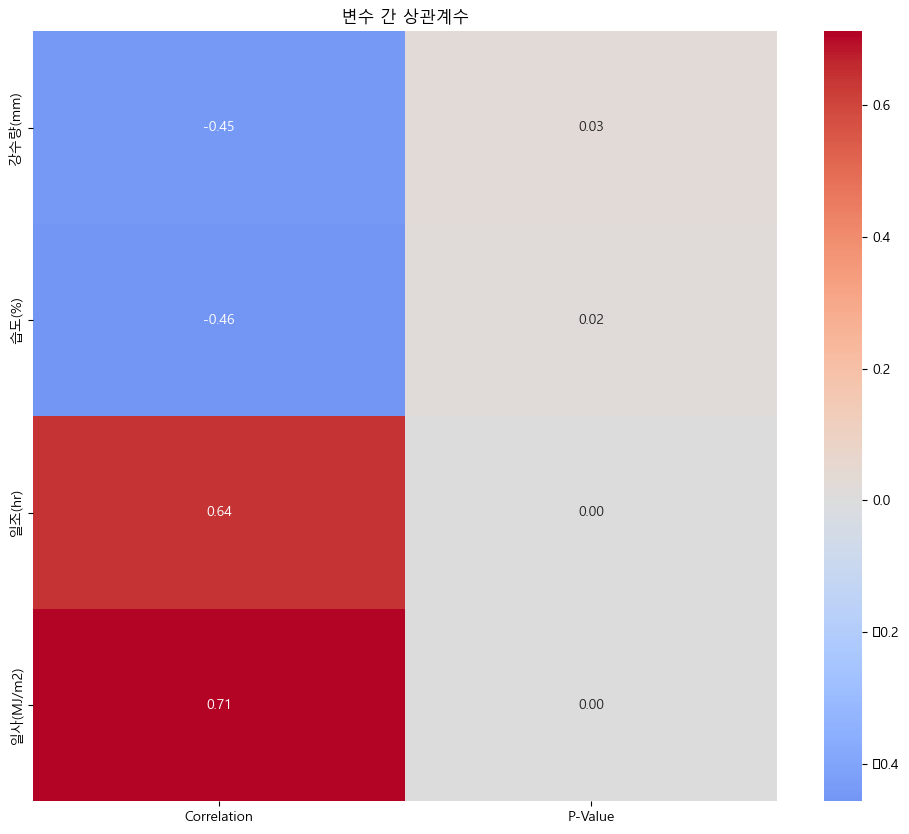

In [71]:
# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(solar_correlations, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('변수 간 상관계수')
plt.show()

In [31]:
significant_solar_correlations = solar_correlations[solar_correlations['Correlation'].abs() >= 0.5]
print("Significant Solar Correlations:")
print(significant_solar_correlations)

Significant Solar Correlations:
           Correlation   P-Value
일조(hr)        0.642068  0.000540
일사(MJ/m2)     0.712676  0.000064


In [32]:
wind_correlations = calculate_correlations(df_merged, '풍력전체')
wind_correlations = wind_correlations[wind_correlations['P-Value'] <= 0.05]
print("Wind Correlations:")
print(wind_correlations)

Wind Correlations:
             Correlation       P-Value
풍속(m/s)         0.821538  4.802964e-07
최저운고(100m )    -0.732264  3.165169e-05


C:\Users\lotte\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\lotte\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


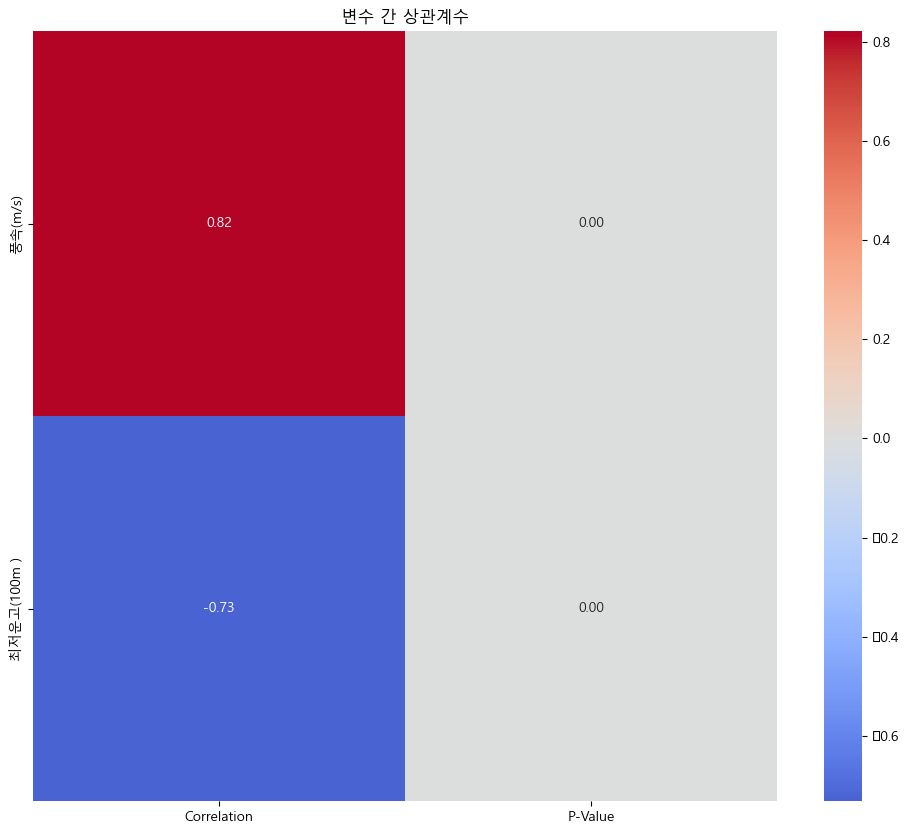

In [72]:
# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(wind_correlations, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('변수 간 상관계수')
plt.show()

In [33]:
significant_wind_correlations = wind_correlations[wind_correlations['Correlation'].abs() >= 0.5]
print("Significant Wind Correlations:")
print(significant_wind_correlations)

Significant Wind Correlations:
             Correlation       P-Value
풍속(m/s)         0.821538  4.802964e-07
최저운고(100m )    -0.732264  3.165169e-05


* 태양광 + 풍력 병합한 데이터로 상관분석 진행했을 때
    * 태양광에서 유의미하고 강한 상관관계 나타내는 기상 컬럼은 일조, 일사
    * 풍력에서 유의미하고 강한 상관관계 나타내는 기상 컬럼은 풍속, 최저운고

### 다중공선성 해결

C:\Users\lotte\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\lotte\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


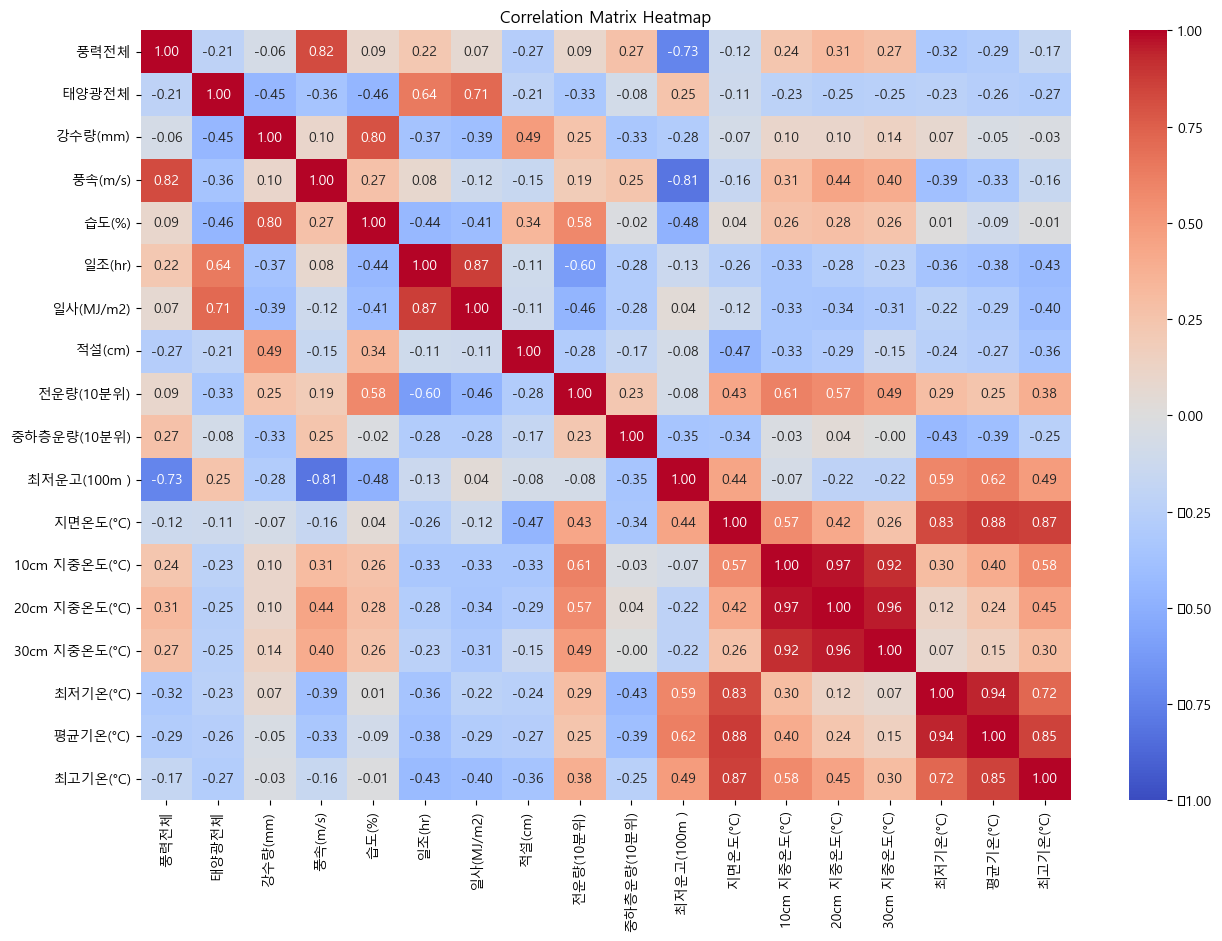

In [35]:
#히트맵 만들어서 독립변수 간 상관계수 확인
df_numeric = df_merged.select_dtypes(include=[float, int])
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()